# Outliers Exercise 1
I referred back to my own project using the iris data set from last semester to reuse some pandas code for this topic
https://github.com/RochejamieGMIT/pands-project
Create box plots on a single set of axes for all five experiments in the morley data set.

In [1]:
import requests
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#I am going to use pandas to create these box plots as it is straight forward
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/morley.csv' #  Get data set url 
ids =  pd.read_csv(url) # import data set from url
ids = ids.drop(ids.columns[0], axis=1) # remove unwanted column // https://stackoverflow.com/questions/39399712/delete-pandas-column-with-no-name
print(ids)


    Expt  Run  Speed
0      1    1    850
1      1    2    740
2      1    3    900
3      1    4   1070
4      1    5    930
..   ...  ...    ...
95     5   16    940
96     5   17    950
97     5   18    800
98     5   19    810
99     5   20    870

[100 rows x 3 columns]


<AxesSubplot:title={'center':'Speed'}, xlabel='Expt'>

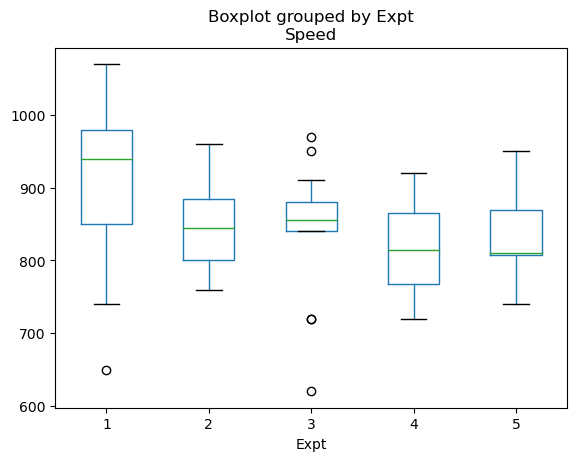

In [2]:
# https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
ids.boxplot(by ='Expt', column =['Speed'], grid = False) # Create box plot 

# Outliers Exercise 2

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

In [3]:
url2 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' #  Get data set url 
# https://www.geeksforgeeks.org/how-to-add-header-row-to-a-pandas-dataframe/
# I am adding a header to the dataframe so I can create the box plots by using the coloumn names instead of column location. 
#The plot will be the 4 measurements plotted by class. 
#Add headers to data
#ids2 =  pd.read_csv(url2) # import data set from url 
ids2 = pd.read_csv(url2, sep='\,',
                         names=['sepal length', 'sepal width', 'petal length', 'petal width','class']) 
  
print(ids2)


C:\Users\Jamie\AppData\Local\Temp\ipykernel_9268\3464793524.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ids2 = pd.read_csv(url2, sep='\,',


     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


<AxesSubplot:title={'center':'sepal length'}, xlabel='class'>

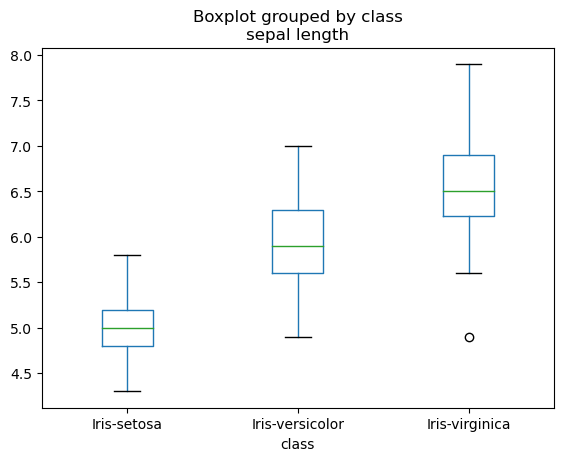

In [4]:
ids2.boxplot(by ='class', column =['sepal length'], grid = False) # Create box plot 

<AxesSubplot:title={'center':'sepal width'}, xlabel='class'>

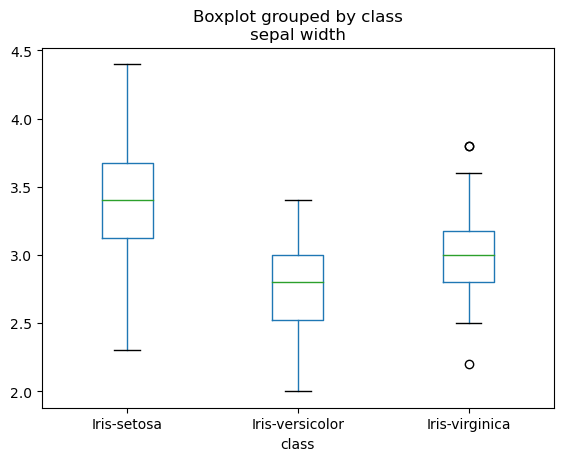

In [5]:
ids2.boxplot(by ='class', column =['sepal width'], grid = False) # Create box plot 

<AxesSubplot:title={'center':'petal length'}, xlabel='class'>

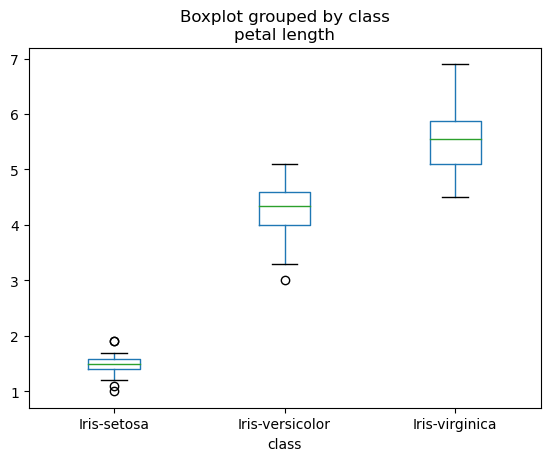

In [6]:
ids2.boxplot(by ='class', column =['petal length'], grid = False) # Create box plot 

<AxesSubplot:title={'center':'petal width'}, xlabel='class'>

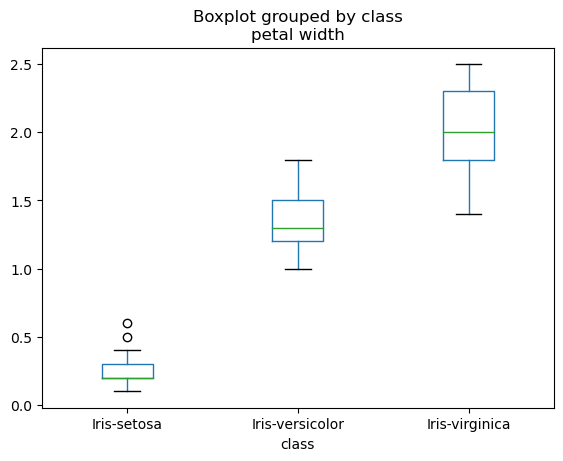

In [7]:
ids2.boxplot(by ='class', column =['petal width'], grid = False) # Create box plot 

# Outliers Exercise 3

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

For the below code, I took the code that was given in the notebook, and inverted the Y value when adding the noise.

I was going to try plot $-x$ against $y^2$, to get the inverse proportional curve, but  the best fit did not work, the best fit line would not fit the plot. I could not get the polynomial line to fit the curve. 

In [66]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [67]:
# Create a corresponding series of y vectors.
ys = np.array([1.0 * -xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = -ys - np.random.normal(0.0, 1.0, ys.shape)

In [68]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

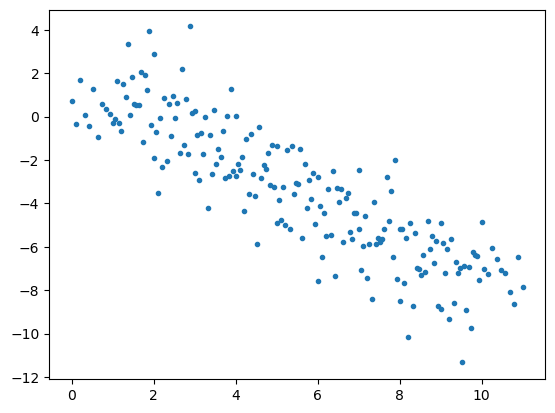

In [69]:
# Plot.
plt.plot(x, y, '.');

In [70]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y,1)


In [71]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

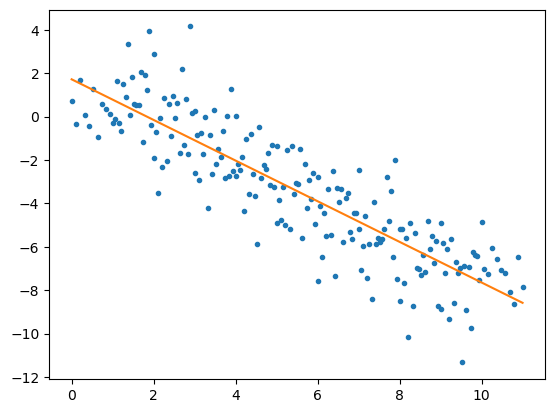

In [72]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

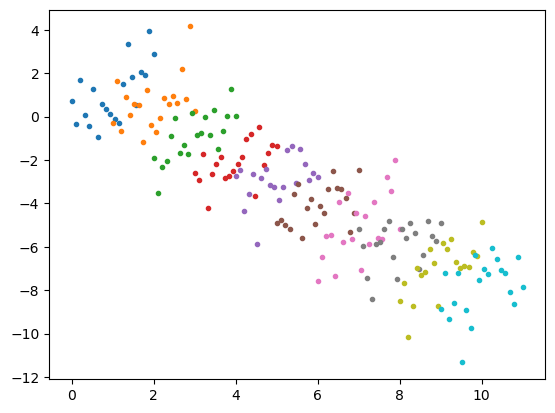

In [76]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')
    

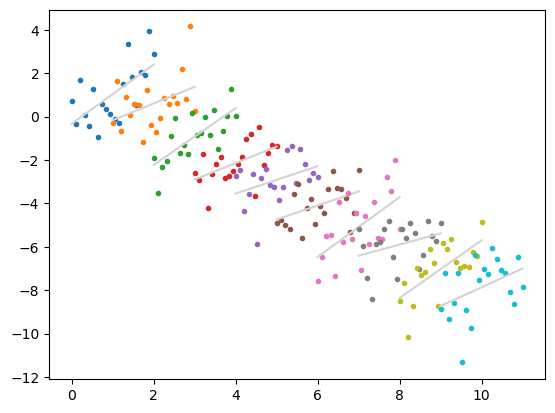

In [74]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

Attempt to plot $-x$ against $y^2$

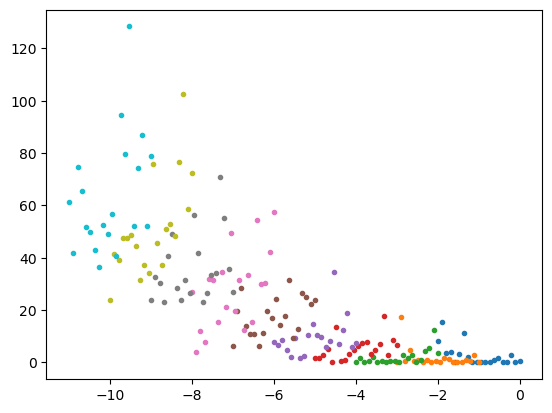

In [78]:
for i in range(len(xs)):
    plt.plot(-xs[i], ys[i]**2, '.')
    


I was going to try plot $-x$ against $y^2$, to get the inverse proportional curve, but  the best fit did not work, the best fit line would not fit the plot. I could not get the polynomial line to fit the curve. 